## CS 372

### Assignment 1 - KNN, Naive Bayes, Python, and You!

- Grace Biggs

- YOUR NAME HERE

- YOUR NAME HERE

- YOUR NAME HERE

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0             5.993117          2.500989           4.542148          1.348742   
1             5.657568          3.714626           1.800290          0.531637   
2             7.751423          2.662903           7.174372          2.335111   
3             5.938142          3.034625           4.448674          1.426435   
4             7.054747          2.741609           4.268965          1.469104   
..                 ...               ...                ...               ...   
147           5.857968          3.949036           1.170024          0.305553   
148           5.966645          2.334692           3.927622          1.186082   
149           7.197063          2.845467           5.882156          2.105997   
150          10.000000          3.500000           8.000000          2.000000   
151           4.500000          2.000000           1.500000          0.200000   

        species  
0    vers

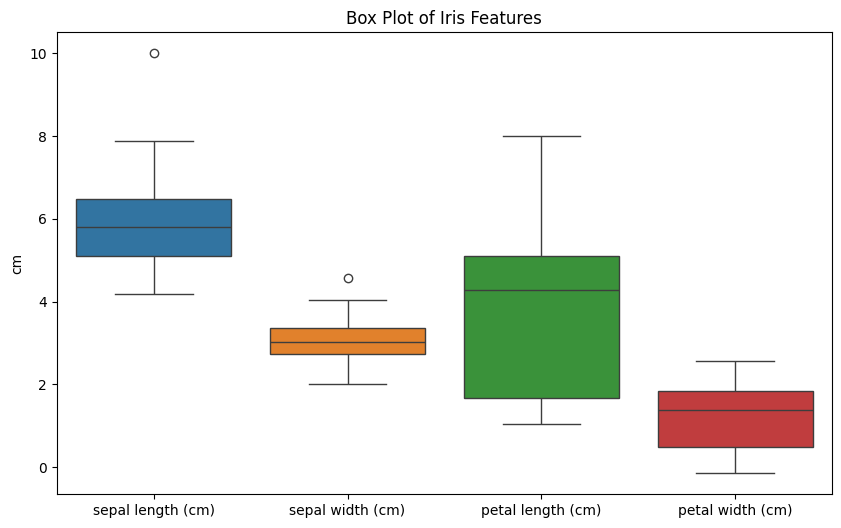

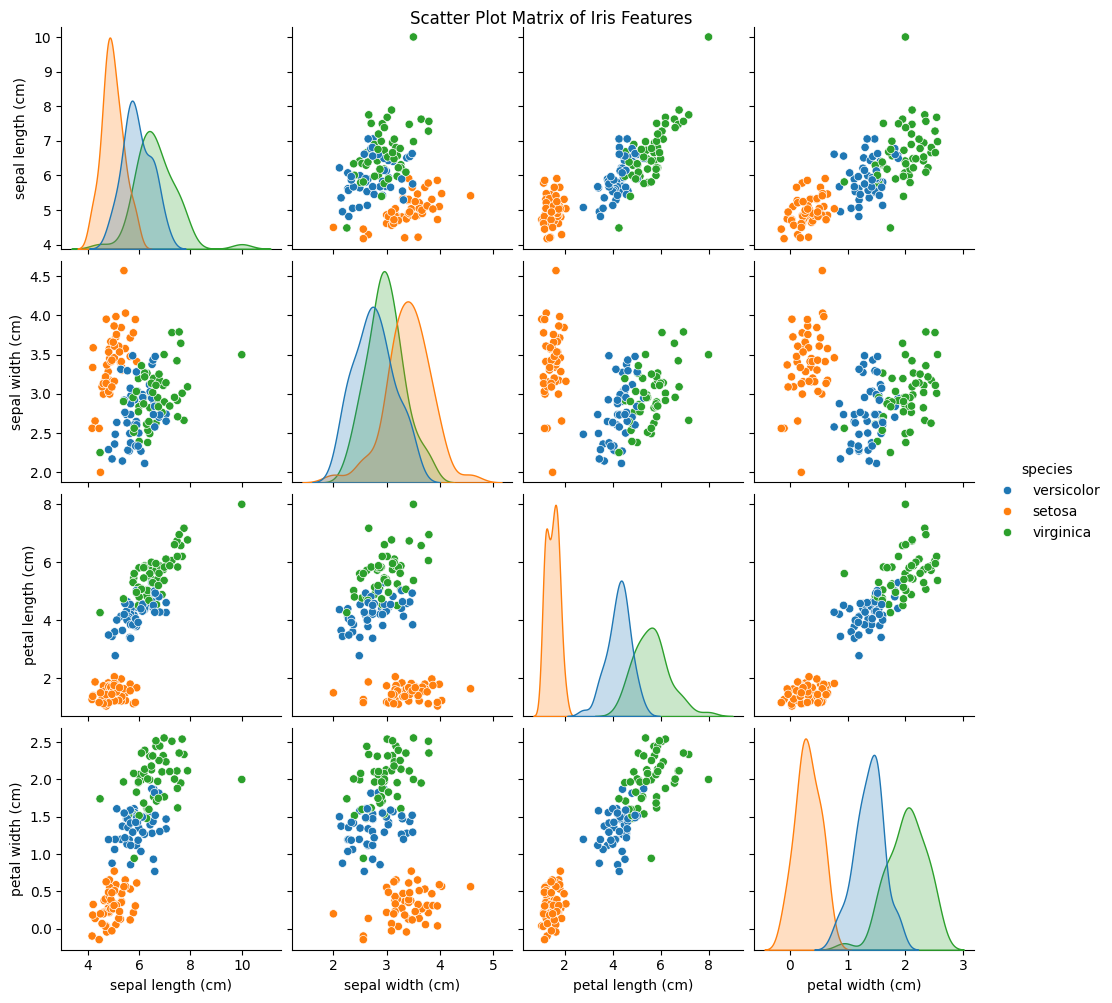

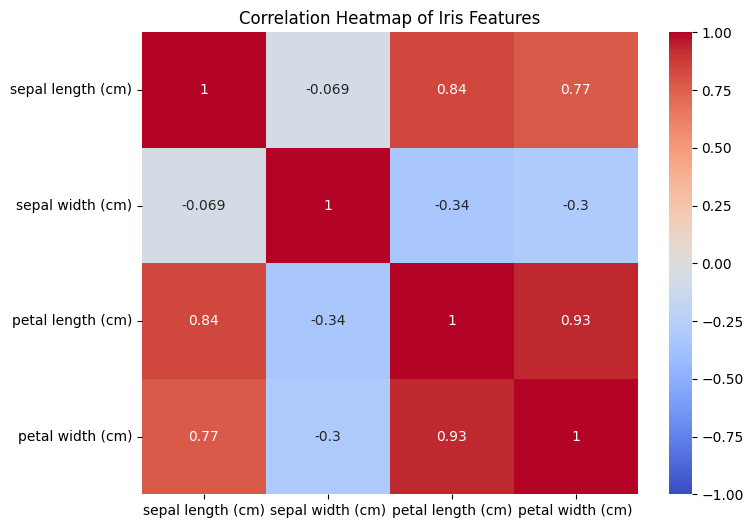

In [2]:
# Question 1. 
# Exploratory Data Analysis For Iris Dataset
## 1. Check for missing data and duplicates.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('iris.csv')
print(df)

print("Duplicate rows: ")
print(df.duplicated().sum()) # no duplicates

print("Missing values: ")
print(df.isnull().sum()) # 8 values missing from the sepal width column

# Fill missing values with median
df['sepal width (cm)'] = df.groupby('species')['sepal width (cm)'].transform(
    lambda x: x.fillna(x.median())
)

## 2. Draw a Box Plot to spot outliers.
plt.figure(figsize=(10, 6))
sns.boxplot(data=df.drop(columns='species'))
plt.title('Box Plot of Iris Features')
plt.ylabel('cm')
plt.show()

## 3. Draw a Scatter Plot Matrix for Iris flowers' descriptive features.
sns.pairplot(df, hue='species', diag_kind='kde')
plt.suptitle('Scatter Plot Matrix of Iris Features', y=1.0)
plt.show()

## 4. Plot Heatmap correlation for descriptive features.
plt.figure(figsize=(8,6))
corr = df.drop(columns='species').corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Iris Features')
plt.show()


In [5]:
# Split the data 80/20.
## 1. Preserve the proportion of each class when splitting. 
## 2. Shuffle data before split. Also make sure this code block reruns and randomizes the split correctly.
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split # https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

X = df.drop(columns='species')
y = df['species']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    stratify=y,
    shuffle=True,
    random_state=42
)

Metric Comparison:
Euclidean - Train: 0.9256, Test: 0.9032
Manhattan - Train: 0.9339, Test: 0.8710


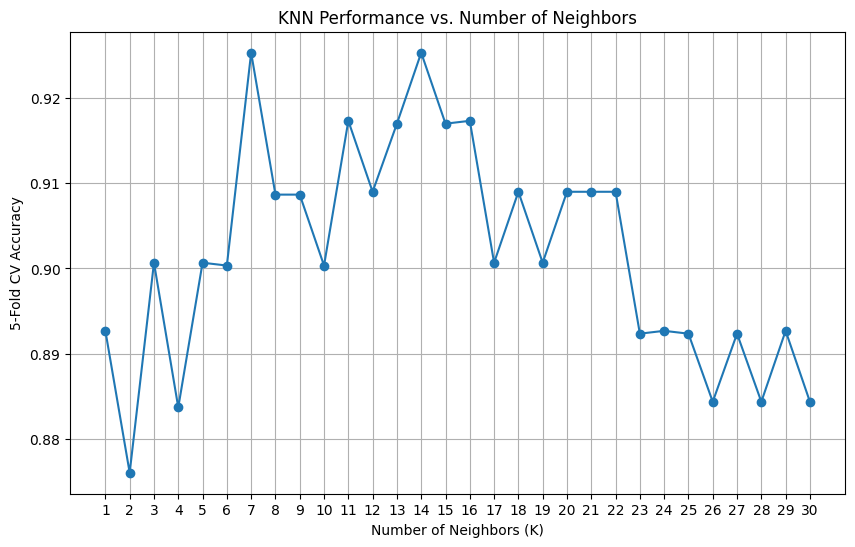

Best K: 7 with accuracy: 0.9253

Test Accuracy (k=7): 0.9032

Misclassified Flowers:
    true_species predicted_species
110   versicolor         virginica
111    virginica        versicolor
84    versicolor         virginica


In [9]:
# KNN
## 3. Use StandardScaler to put all descriptive features on the same scale.
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler # https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.neighbors import KNeighborsClassifier # https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
from sklearn.model_selection import cross_val_score # https://scikit-learn.org/stable/modules/cross_validation.html

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 4. Implement KNN using SKLearn's KNeighborsClassifier.
## 5. Experiment with different distance metrics (Euclidean and Manhattan). Compare the two and comment on your findings.
metrics = ['euclidean', 'manhattan']
results = {}

for metric in metrics:
    knn = KNeighborsClassifier(n_neighbors=5, metric=metric)
    knn.fit(X_train_scaled, y_train)
    train_acc = knn.score(X_train_scaled, y_train)
    test_acc = knn.score(X_test_scaled, y_test)
    results[metric] = {'train': train_acc, 'test': test_acc}

print("Metric Comparison:")
for metric, scores in results.items():
    print(f"{metric.capitalize()} - Train: {scores['train']:.4f}, Test: {scores['test']:.4f}")
# Euclidean performs 3% better than Manhattan on the Test dataset, and only marginally worse than Manhattan on the training set.
# Both are comparable to each other but it's safe to say that Euclidean provides better accuracy.

## 6. Choose the best number of neighbors using 5-fold cross validation.
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html
k_values = np.arange(1, 31) # Realistically overkill but this makes for a nice graph
cv_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

## 7. Draw a 2D plot to show the average accuracy of KNN classifier vs. different values of K. Analyze the result and comment on the plot.
plt.figure(figsize=(10, 6))
plt.plot(k_values, cv_scores, marker='o', linestyle='-')
plt.title('KNN Performance vs. Number of Neighbors')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('5-Fold CV Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()

best_k = k_values[np.argmax(cv_scores)]
print(f"Best K: {best_k} with accuracy: {max(cv_scores):.4f}")

## 8. Evaluate your model on the test data using Accuracy based on the best K found above. 
best_knn = KNeighborsClassifier(n_neighbors=best_k, metric='euclidean')
best_knn.fit(X_train_scaled, y_train)
test_accuracy = best_knn.score(X_test_scaled, y_test)
print(f"\nTest Accuracy (k={best_k}): {test_accuracy:.4f}")

## Show misclassified flowers in a table, with the true label in one column and the predicted table in another column. Comment on results.
y_pred = best_knn.predict(X_test_scaled)
misclassified = X_test.copy()
misclassified['true_species'] = y_test
misclassified['predicted_species'] = y_pred
misclassified = misclassified[y_test != y_pred]

print("\nMisclassified Flowers:")
print(misclassified[['true_species', 'predicted_species']])
# Three flowers misclassified 

In [10]:
# Naive Bayes
## 1. Use the built-in SKLearn library to predict the species of Iris in the test dataset.
from sklearn.naive_bayes import GaussianNB # https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html
from sklearn.metrics import accuracy_score # https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html

nb_classifier = GaussianNB()
nb_classifier.fit(X_train_scaled, y_train)
y_pred_nb = nb_classifier.predict(X_test_scaled)

## 2. Use Accuracy to assess the performance of your classifier.
nb_accuracy = accuracy_score(y_test, y_pred_nb)
print(f"\nNaive Bayes Test Accuracy: {nb_accuracy:.4f}")

## 3. Show misclassified flowers in a table, with the true label in one column and the predicted table in another column. Comment on it.
misclassified_nb = X_test.copy()
misclassified_nb['true_species'] = y_test
misclassified_nb['predicted_species'] = y_pred_nb
misclassified_nb = misclassified_nb[y_test != y_pred_nb]
print("\nMisclassified Flowers (Naive Bayes):")
print(misclassified_nb[['true_species', 'predicted_species']])
# Accuracy and misclassifications are exactly the same as KNN... 


Naive Bayes Test Accuracy: 0.9032

Misclassified Flowers (Naive Bayes):
    true_species predicted_species
110   versicolor         virginica
111    virginica        versicolor
84    versicolor         virginica


In [ ]:
# Question 2. Predicting the onset of diabetes based on diagnostic measures.
# Exploratory Data Analysis of Pima Indians Diabetes Database.

## 1. Check for missing data and duplicates.

## ...